In [ ]:
# Question 6 (Manually)
n = len(x)
# slope= stats.linregress(x, y)
print(stats.linregress(x, y))
# Compute the degrees of freedom
df_res = n - 2

# Set the desired level of significance
alpha = 0.05

# Compute the critical t-value
t_crit = stats.t.ppf(1 - alpha / 2, df_res)

# Calculate sample variance of Y
sy = 1/(len(y)-1) * (y - np.mean(y))

# Compute the confidence interval for the slope coefficient
se_slope = sy / np.sqrt(np.sum((x - np.mean(x))**2))
lower = slope - t_crit * se_slope
upper = slope + t_crit * se_slope

# Print the confidence interval
print(f"Confidence interval for slope coefficient: ({lower}, {upper})")

In [169]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.stats.anova import anova_lm

In [170]:
# Question 1
# Read the Excel file
df = pd.read_excel('Exemple2Reference_SReg.xlsx')

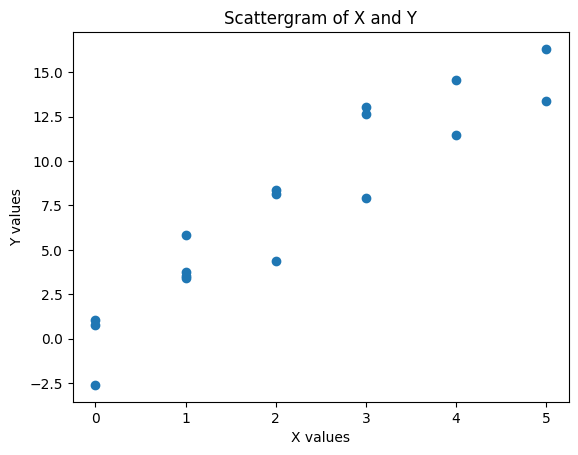

In [171]:
# Question 2
# Assign the contents of the file
x = df['X']
y = df['Y']

# Plot the scattergram
plt.plot(x, y, 'o')

# Add labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scattergram of X and Y')

# Show the plot
plt.show()

In [172]:
# Question 3
# Add a constant to X
x = sm.add_constant(x)
# Fit the linear regression model
model = smf.ols('Y ~ X', data=df).fit()
# Print the model summary
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6697      0.805      0.832      0.418      -1.046       2.385
X              3.0949      0.297     10.428      0.000       2.462       3.728


c:\Users\Louay\PycharmProjects\data_analysis_2\venv\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


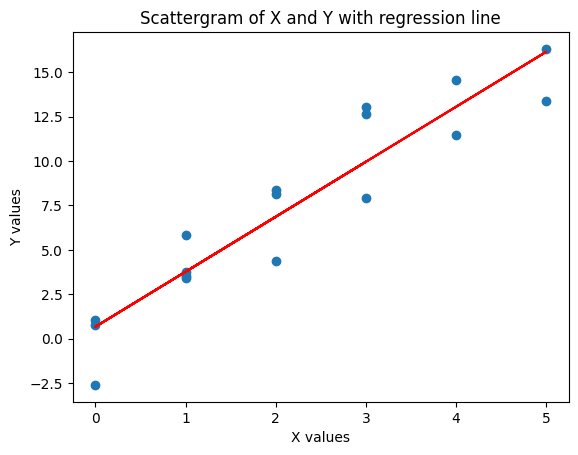

In [173]:
# Question 4
# Plot the scattergram
plt.plot(x["X"], y, 'o')
# Plot the regression line
plt.plot(x["X"], model.predict(x), '-r')

# Add labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scattergram of X and Y with regression line')

# Show the plot
plt.show()


In [174]:
# Question 5
# Generating the anova table
anova = statsmodels.api.stats.anova_lm(model, typ=2)
# Print the model summary
print(anova)


              sum_sq    df           F        PR(>F)
X         425.959048   1.0  108.734732  2.872479e-08
Residual   58.761222  15.0         NaN           NaN


In [175]:
# Question 6
# Use the model object obtained earlier
conf_int = model.conf_int(alpha=0.05)
# Print the confidence interval
print(conf_int)

                  0         1
Intercept -1.045745  2.385083
X          2.462293  3.727520
